In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_4.csv", sep = ";").drop("Unnamed: 0", 1).sample(700000)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Renda_Mensal,Empregada_Domestica,Freezer,Computador,Regiao,Renda_per_capta,Celulares_por_pessoa,Acertou
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,16.565974,0.411094,2.138094,0.449179,0.526360,19.940126,2.857380,3.342274,4.066260,2.201779,3.505430,0.142320,0.409936,0.688890,2.214469,837.474569,0.673973,0.717439
std,7.986475,0.492033,1.011526,0.615252,0.499305,7.163793,3.964161,1.958128,1.738689,1.512588,3.262616,0.566866,0.625033,0.773235,1.509627,1254.706460,0.311119,0.450245
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,0.000000,0.000000,16.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,299.400000,0.500000,0.000000
50%,18.000000,0.000000,2.000000,0.000000,1.000000,17.000000,1.000000,3.000000,5.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,499.000000,0.666667,1.000000
75%,25.000000,1.000000,3.000000,1.000000,1.000000,21.000000,4.000000,5.000000,5.000000,3.000000,5.000000,0.000000,1.000000,1.000000,4.000000,831.666667,1.000000,1.000000
max,26.000000,1.000000,5.000000,2.000000,1.000000,85.000000,13.000000,7.000000,7.000000,5.000000,16.000000,3.000000,4.000000,4.000000,4.000000,30000.000000,4.000000,1.000000


## Reducing dimension with PCA

### Standarizing values

In [3]:
data_std = data.drop(["DESEMPENHO_BAIXO", "Acertou", "Previsao"], 1)[:]
for col in data_std.columns:
    mean = data_std[col].mean()
    std = data_std[col].std()
    data_std[col] = (data_std[col]-mean)/std

### Applying PCA

In [4]:
pca = PCA(n_components=2).fit(data_std)
pca_2d = pca.transform(data_std)
print("Explained Variance: " + str(100*round(sum(pca.explained_variance_ratio_), 2)) + "%.")

Explained Variance: 40.0%.


## Clusters

### Using the Elbow Method to find the best number of clusters

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_std)
    distortions.append(kmeanModel.inertia_)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 5))
    plt.plot(K, distortions, 'bx-')

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 5), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    plt.plot(K, distortions, 'wx-')

plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.show()

### Applying result to K-Means

In [5]:
n = 3
kmeans = KMeans(n_clusters = n).fit(data.drop(["TP_ESCOLA", "NU_IDADE", "TP_ANO_CONCLUIU"], 1))
labels = kmeans.labels_
data["Cluster"] = labels

### Ploting Clusters

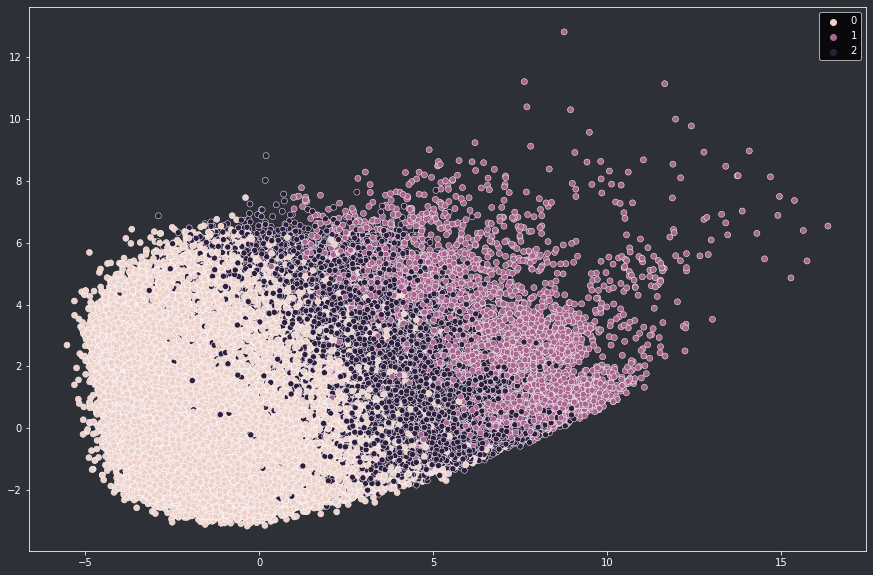

In [6]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=labels, cmap = "mako")

## Cluster's statistics

### Cluster sizes

In [7]:
print("Tamanho do Cluster 0: " + str(len(data[data["Cluster"] == 0])))
print("Tamanho do Cluster 1: " + str(len(data[data["Cluster"] == 1])))
print("Tamanho do Cluster 2: " + str(len(data[data["Cluster"] == 2])))

Tamanho do Cluster 0: 607826
Tamanho do Cluster 1: 9816
Tamanho do Cluster 2: 82358


### Cluster precision

In [8]:
acertou_0 = len(data[data["Cluster"] == 0][data["Acertou"] == 1])
total_0 = len(data[data["Cluster"] == 0])
precision_0 = round(acertou_0/total_0*100, 2)

acertou_1 = len(data[data["Cluster"] == 1][data["Acertou"] == 1])
total_1 = len(data[data["Cluster"] == 1])
precision_1 = round(acertou_1/total_1*100, 2)

acertou_2 = len(data[data["Cluster"] == 2][data["Acertou"] == 1])
total_2 = len(data[data["Cluster"] == 2])
precision_2 = round(acertou_2/total_2*100, 2)


print("Precisão do Cluster 0: " + str(precision_0) + "%")
print("Precisão do Cluster 1: " + str(precision_1) + "%")
print("Precisão do Cluster 2: " + str(precision_2) + "%")

Precisão do Cluster 0: 69.69%
Precisão do Cluster 1: 95.03%
Precisão do Cluster 2: 84.1%


In [9]:
data = data[data["Cluster"]!=1]

In [10]:
data_std = data.drop(["DESEMPENHO_BAIXO", "Acertou", "Previsao"], 1)[:]
for col in data_std.columns:
    mean = data_std[col].mean()
    std = data_std[col].std()
    data_std[col] = (data_std[col]-mean)/std
pca_2d = PCA(n_components=2).fit_transform(data_std)

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_std)
    distortions.append(kmeanModel.inertia_)

if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 5))
    plt.plot(K, distortions, 'bx-')

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 5), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)
    plt.plot(K, distortions, 'wx-')

plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.show()

In [11]:
n = 2
kmeans = KMeans(n_clusters = n).fit(data.drop(["TP_ESCOLA", "NU_IDADE", "TP_ANO_CONCLUIU"], 1))
labels = kmeans.labels_
data["Cluster"] = labels

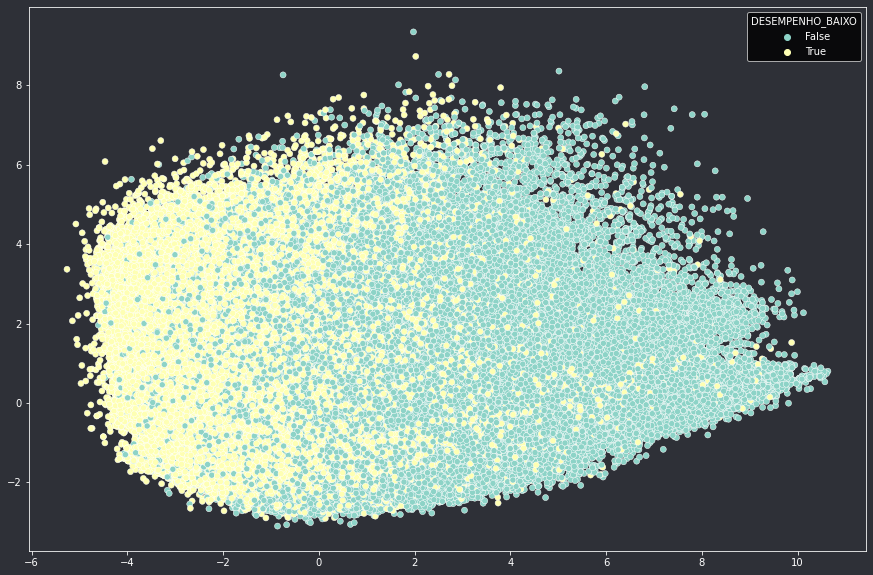

In [12]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["DESEMPENHO_BAIXO"], cmap = "mako")

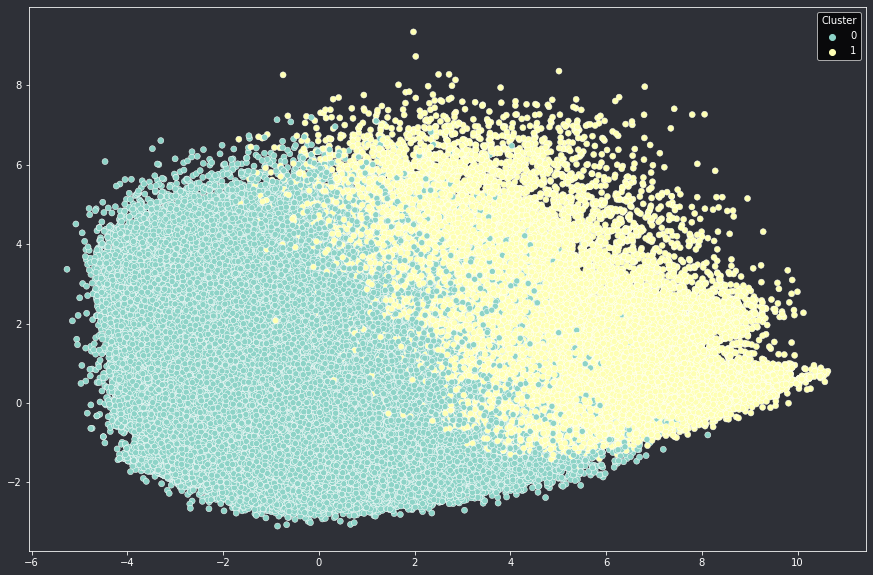

In [13]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(15, 10))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 10), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=data["Cluster"], cmap = "mako")

In [ ]:
print("Tamanho do Cluster 0: " + str(len(data[data["Cluster"] == 0])))
print("Tamanho do Cluster 1: " + str(len(data[data["Cluster"] == 1])))
print("Tamanho do Cluster 2: " + str(len(data[data["Cluster"] == 2])))

## Building new model without intermediate cluster

### Removing the intermediate cluster and balancing dataset

In [ ]:
train, test = train_test_split(data.drop(["Cluster", "Previsao", "Acertou"], 1), test_size=0.30)
size = len(train[train["DESEMPENHO_BAIXO"] == 1])
train = train[train["DESEMPENHO_BAIXO"] == 1].append(train[train["DESEMPENHO_BAIXO"] == 0].sample(size), sort=False)

In [ ]:
# Finding the intermediate Cluster, i.e the Cluster with lower precision, and removing from data

if precision_0 < precision_1 and precision_0 < precision_2:
    data = data[data["Cluster"]!=0]
    print("Cluster 0 removido")
    
if precision_1 < precision_0 and precision_1 < precision_2:
    data = data[data["Cluster"]!=1]
    print("Cluster 1 removido")

if precision_2 < precision_1 and precision_2 < precision_0:
    data = data[data["Cluster"]!=2]
    print("Cluster 2 removido")
    


train, test = train_test_split(data.drop(["Cluster", "Previsao", "Acertou"], 1), test_size=0.30)
size = len(train[train["DESEMPENHO_BAIXO"] == 0])
train = train[train["DESEMPENHO_BAIXO"] == 0].append(train[train["DESEMPENHO_BAIXO"] == 1].sample(size), sort=False)

### XGBoost

In [ ]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)

print("Precision: " + str(precision) + "%")
print("Recall: " + str(recall) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues,
                      values_format = "d")

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Finding the best parameters

In [ ]:
grid = {'max_depth':          [8, 12, 15, 20],
        'min_samples_split':  [100, 200, 500, 1000, 2000, 3500, 5000, 10000],
        'min_samples_leaf':   [20, 40, 60, 80, 150, 300, 500, 1000, 2000],
        'ccp_alpha':          [0.000005, 0.000001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0],
        'min_impurity_split': [0.000005, 0.000001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0]
        }

rf = DecisionTreeClassifier()
rf_random = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs = -1)
rf_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
rf_random.best_params_

In [ ]:
model = DecisionTreeClassifier(max_depth = 15, min_samples_split = 2000, 
                               min_samples_leaf = 40).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Plotting tree

In [ ]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 15))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 15), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True, max_depth=4, fontsize=16)